<a href="https://colab.research.google.com/github/khangdltUIT/notebook/blob/main/genetic_algorithms_for_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/REPORT/CourseProject/Mathematics for CS/breast_cancer_wisconsin.csv' '/content/breast_cancer_wisconsin.csv'

#Breast Cancer Wisconsin

## Analysis Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
features_name = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
len(features_name)

30

In [ ]:
df = pd.read_csv('/content/breast_cancer_wisconsin.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
x = df[features_name]
y = df['diagnosis']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


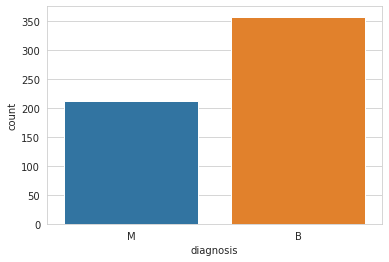

In [ ]:
sns.countplot(y, label = "Count")

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df[features_name], df['diagnosis'], test_size = 0.2, random_state = 0)

## Genetic Algorithms

In [ ]:
!pip install sklearn-genetic

In [ ]:
from __future__ import print_function
import numpy as np
from sklearn import datasets, linear_model

from genetic_selection import GeneticSelectionCV


#iris = datasets.load_iris()
# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(xtrain), 20))

#X = np.hstack((x, E))
#print(X)
#print(y)
report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 
estimator = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

for i in range(2,31):
    selector = GeneticSelectionCV(  estimator,
                                    cv=5,
                                    verbose=1,
                                    scoring="accuracy",
                                    max_features=i,
                                    n_population=10*i,
                                    crossover_proba=0.5,
                                    mutation_proba=0.2,
                                    n_generations=10,
                                    crossover_independent_proba=0.5,
                                    mutation_independent_proba=0.05,
                                    #tournament_size=3,
                                    n_gen_no_change=10,
                                    caching=True,
                                    n_jobs=-1)
    selector = selector.fit(xtrain, ytrain)
    genfeats = xtrain.columns[selector.support_]
    genfeats = list(genfeats)
    print("Subset features choosed:",genfeats)
    cv_score = selector.generation_scores_[-1]
    nofeats.append(len(genfeats)) 
    chosen_feats.append(genfeats) 
    cvscore.append(cv_score)
    
report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore


Selecting features with genetic algorithm.
gen	nevals	avg                    	std                    	min                    	max                    
0  	200   	[0.77289011 1.575     ]	[0.11194481 0.494343  ]	[0.63736264 1.        ]	[0.93846154 2.        ]
1  	109   	[-1.94930934e+03  1.89000000e+00]	[3.96234699e+03 9.26228913e-01]	[-10000.      0.]      	[0.93846154 5.        ]
2  	103   	[-2.49933054e+03  2.09000000e+00]	[4.33051353e+03 1.04494019e+00]	[-10000.      0.]      	[0.93846154 7.        ]
3  	108   	[-2.99936896e+03  2.22500000e+00]	[4.58298881e+03 1.16377618e+00]	[-10000.      0.]      	[0.93846154 7.        ]
4  	120   	[-2.59932871e+03  2.16500000e+00]	[4.38674034e+03 9.93868704e-01]	[-10000.      0.]      	[0.93846154 7.        ]
5  	117   	[-2.59932298e+03  2.23500000e+00]	[4.38674374e+03 1.04870158e+00]	[-10000.      0.]      	[0.93846154 7.        ]
6  	120   	[-2049.27649451     2.1       ]  	[4.03738362e+03 9.59166305e-01]	[-10000.      0.]      	[0.93846154 8.   

In [ ]:
report["Scores"] = np.round(report["Scores"], 3)
report.sort_values(by = "Scores", ascending = False, inplace = True)
print(report)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
#DataTable(report)
print(ga_feats)

    No of Feats                                       Chosen Feats  Scores
27           16  [radius_mean, area_mean, smoothness_mean, conc...   0.967
24           13  [radius_mean, area_mean, smoothness_mean, conc...   0.967
23           18  [radius_mean, area_mean, smoothness_mean, comp...   0.967
22           15  [radius_mean, area_mean, concavity_mean, conca...   0.967
21           14  [radius_mean, area_mean, concavity_mean, conca...   0.967
25           16  [radius_mean, area_mean, concavity_mean, conca...   0.967
18           14  [radius_mean, texture_mean, area_mean, smoothn...   0.965
10           11  [radius_mean, texture_mean, area_mean, texture...   0.965
11            9  [radius_mean, area_mean, compactness_mean, rad...   0.965
28           15  [radius_mean, texture_mean, area_mean, smoothn...   0.965
17           14  [radius_mean, texture_mean, area_mean, smoothn...   0.965
12           13  [radius_mean, texture_mean, area_mean, radius_...   0.965
19           11  [radius_

In [ ]:
len(ga_feats)

16

In [ ]:
df[ga_feats]

,radius_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,radius_se,texture_se,concavity_se,concave points_se,symmetry_se,texture_worst,perimeter_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,1001.0,0.11840,0.30010,0.14710,1.0950,0.9053,0.05373,0.01587,0.03003,17.33,184.60,0.66560,0.7119,0.2654,0.4601
1,20.57,1326.0,0.08474,0.08690,0.07017,0.5435,0.7339,0.01860,0.01340,0.01389,23.41,158.80,0.18660,0.2416,0.1860,0.2750
2,19.69,1203.0,0.10960,0.19740,0.12790,0.7456,0.7869,0.03832,0.02058,0.02250,25.53,152.50,0.42450,0.4504,0.2430,0.3613
3,11.42,386.1,0.14250,0.24140,0.10520,0.4956,1.1560,0.05661,0.01867,0.05963,26.50,98.87,0.86630,0.6869,0.2575,0.6638
4,20.29,1297.0,0.10030,0.19800,0.10430,0.7572,0.7813,0.05688,0.01885,0.01756,16.67,152.20,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,1479.0,0.11100,0.24390,0.13890,1.1760,1.2560,0.05198,0.02454,0.01114,26.40,166.10,0.21130,0.4107,0.2216,0.2060
565,20.13,1261.0,0.09780,0.14400,0.09791,0.7655,2.4630,0.03950,0.01678,0.01898,38.25,155.00,0.19220,0.3215,0.1628,0.2572
566,16.60,858.1,0.08455,0.09251,0.05302,0.4564,1.0750,0.04730,0.01557,0.01318,34.12,126.70,0.30940,0.3403,0.1418,0.2218
567,20.60,1265.0,0.11780,0.35140,0.15200,0.7260,1.5950,0.07117,0.01664,0.02324,39.42,184.60,0.86810,0.9387,0.2650,0.4087


In [ ]:
df[ga_feats].corr()

,radius_mean,texture_mean,area_mean,concave points_mean,radius_se,perimeter_se,compactness_se,fractal_dimension_se,perimeter_worst,concavity_worst,concave points_worst,symmetry_worst
radius_mean,1.000000,0.323782,0.987357,0.822529,0.679090,0.674172,0.206000,-0.042641,0.965137,0.526911,0.744214,0.163953
texture_mean,0.323782,1.000000,0.321086,0.293464,0.275869,0.281673,0.191975,0.054458,0.358040,0.301025,0.295316,0.105008
area_mean,0.987357,0.321086,1.000000,0.823269,0.732562,0.726628,0.212583,-0.019887,0.959120,0.512606,0.722017,0.143570
concave points_mean,0.822529,0.293464,0.823269,1.000000,0.698050,0.710650,0.490424,0.257584,0.855923,0.752399,0.910155,0.375744
radius_se,0.679090,0.275869,0.732562,0.698050,1.000000,0.972794,0.356065,0.227754,0.719684,0.380585,0.531062,0.094543
perimeter_se,0.674172,0.281673,0.726628,0.710650,0.972794,1.000000,0.416322,0.244143,0.721031,0.418899,0.554897,0.109930
compactness_se,0.206000,0.191975,0.212583,0.490424,0.356065,0.416322,1.000000,0.803269,0.260516,0.639147,0.483208,0.277878
fractal_dimension_se,-0.042641,0.054458,-0.019887,0.257584,0.227754,0.244143,0.803269,1.000000,-0.001000,0.379975,0.215204,0.111094
perimeter_worst,0.965137,0.358040,0.959120,0.855923,0.719684,0.721031,0.260516,-0.001000,1.000000,0.618344,0.816322,0.269493
concavity_worst,0.526911,0.301025,0.512606,0.752399,0.380585,0.418899,0.639147,0.379975,0.618344,1.000000,0.855434,0.532520


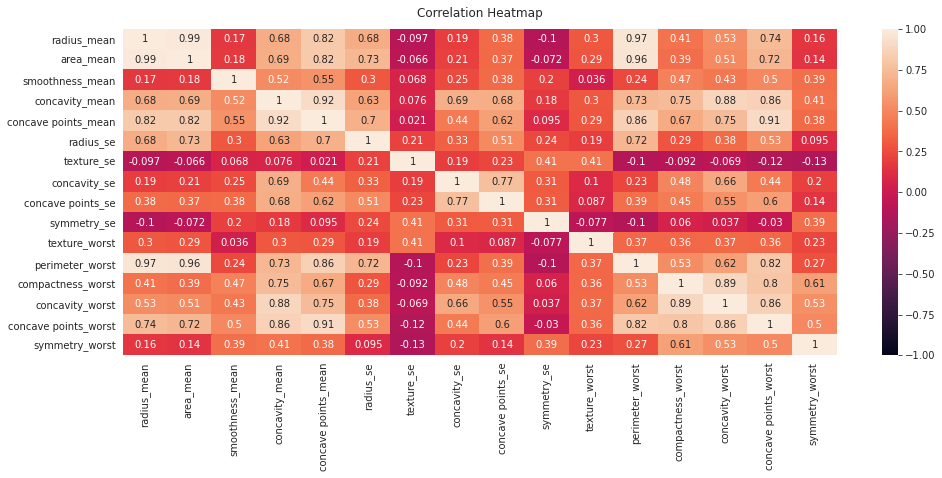

In [ ]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df[ga_feats].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### Dữ liệu ban đầu

In [ ]:
xtrain.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,10.05,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,0.2619,2.0150,1.778,16.85,0.007803,0.01449,0.01690,0.008043,0.02100,0.002778,11.16,26.84,71.98,384.0,0.1402,0.1402,0.1055,0.06499,0.2894,0.07664
427,10.80,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,0.3077,1.6210,2.240,20.20,0.006543,0.02148,0.02991,0.010450,0.01844,0.002690,12.76,32.04,83.69,489.5,0.1303,0.1696,0.1927,0.07485,0.2965,0.07662
406,16.14,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.01246,0.01831,0.008747,0.01500,0.001621,17.71,19.58,115.90,947.9,0.1206,0.1722,0.2310,0.11290,0.2778,0.07012


In [ ]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = model.predict(xtest)

In [ ]:
print(classification_report(ytest, y_pred=prediction))

              precision    recall  f1-score   support

           B       0.97      0.94      0.95        67
           M       0.92      0.96      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



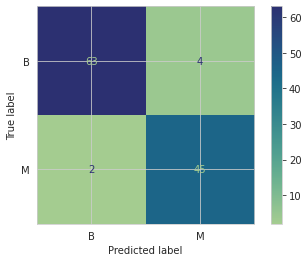

In [ ]:
plot_confusion_matrix(model, xtest , ytest ,cmap='crest', values_format = '.5g')

### Áp dụng thuật toán GAs

In [ ]:
xtrain_gas = xtrain[ga_feats]
xtest_gas = xtest[ga_feats]

In [ ]:
xtrain_gas.head(3)

,radius_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,radius_se,texture_se,concavity_se,concave points_se,symmetry_se,texture_worst,perimeter_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
338,10.05,310.8,0.10070,0.02511,0.01775,0.2619,2.0150,0.01690,0.008043,0.02100,26.84,71.98,0.1402,0.1055,0.06499,0.2894
427,10.80,359.9,0.08801,0.03614,0.01404,0.3077,1.6210,0.02991,0.010450,0.01844,32.04,83.69,0.1696,0.1927,0.07485,0.2965
406,16.14,800.0,0.09495,0.05500,0.04528,0.2387,0.6372,0.01831,0.008747,0.01500,19.58,115.90,0.1722,0.2310,0.11290,0.2778


In [ ]:
model = LogisticRegression()
model.fit(xtrain_gas, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = model.predict(xtest_gas)

In [ ]:
print(classification_report(ytest, y_pred=prediction))

              precision    recall  f1-score   support

           B       0.98      0.96      0.97        67
           M       0.94      0.98      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



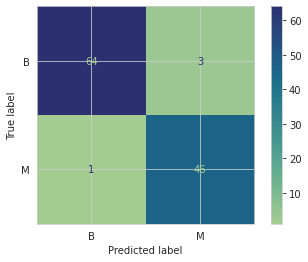

In [ ]:
plot_confusion_matrix(model, xtest_gas, ytest ,cmap='crest', values_format = '.5g')